In [7]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

### Variance, Standard Deviation, Range, Percentile, Quantile

In [2]:
df=sns.load_dataset("iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
print(np.var(df["sepal_length"])) #variance
print(np.std(df["sepal_length"])) #standard devaition
r=max(df["sepal_length"])-min(df["sepal_length"]) #range
print(r)
le=len(df["sepal_length"])
P25=25*(le+1)/100 #25th percentile
print(P25) #5th index is 5 so p25=5
p20=20*(le+1)/100 #20th percentile
print(p20)
print(np.percentile(df["sepal_length"],[20,25,30])) #20th,25th,30th percentile
print(np.quantile(df["sepal_length"],[0.20,0.25,0.30])) #20th,25th,30th quantile

0.6811222222222222
0.8253012917851409
3.6000000000000005
37.75
30.2
[5.   5.1  5.27]
[5.   5.1  5.27]


### Kurtosis

#### Normal distribution

In [5]:
x=np.random.normal(loc=50,scale=5,size=100000) #loc: mean, scale: std, size: no. of vals req

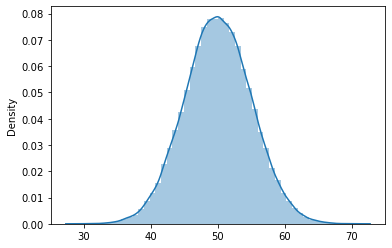

In [16]:
sns.distplot(x);

- No skewness, so data is symmetric
- No kurtosis

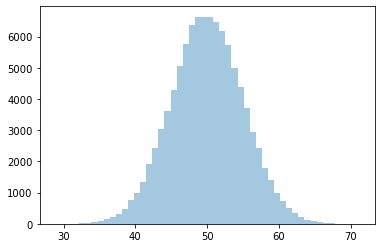

In [15]:
sns.distplot(x,kde=False); # to remove kernel density

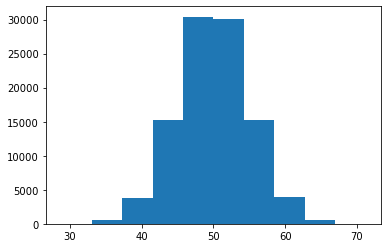

In [14]:
plt.hist(x);

#### Checking kurtosis

In [18]:
st.kurtosis(x) #by default gives excess, which is close to 0, so mesokurtic

0.010025487400108446

- fisher=True, for excess kurtosis
- for standard solution, fisher=False

In [19]:
print(st.kurtosis(x,fisher=False))
print(st.skew(x))#skewness close to 0

3.0100254874001084
0.00732963069714825


### Detecting normal distribution

In [21]:
print(np.mean(x))
print(st.mode(x))
print(np.median(x))

50.000011606434484
ModeResult(mode=array([28.79641952]), count=array([1]))
49.98376793372587


### qqplot

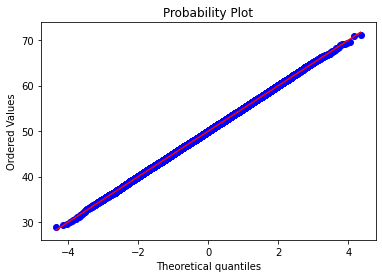

In [22]:
import pylab
st.probplot(x,dist="norm",plot=pylab);

- If data points lie on the line implies distribution is normal.

In [23]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Detect if fare is normally distributed

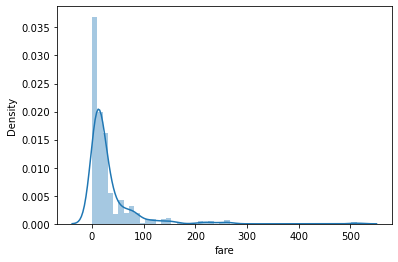

In [25]:
sns.distplot(df["fare"]);

- Highly right skewed data

In [26]:
df["fare"].skew()

4.787316519674893

#### qq plot

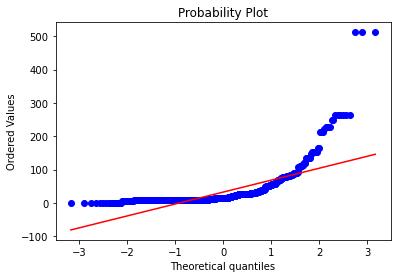

In [27]:
st.probplot(df["fare"],dist="norm",plot=pylab);

- Now, use log tranformation, as data is right skewed
    - either x= np.log(), x has no skewness then
    - in built function of ML: sklearn(ML lib)

In [28]:
from sklearn.preprocessing import FunctionTransformer
f=FunctionTransformer(func=np.log1p) #on object made
f

FunctionTransformer(func=<ufunc 'log1p'>)

In [29]:
fare1=f.fit_transform(df["fare"])
fare1

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: fare, Length: 891, dtype: float64

#### qq plot

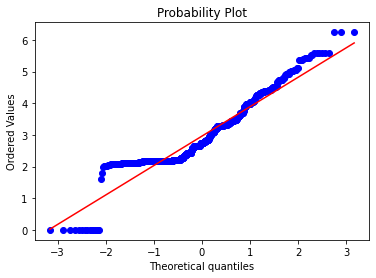

In [30]:
st.probplot(fare1,dist="norm",plot=pylab);

In [31]:
st.skew(fare1) #skewness reduced from 4 to 0.3

0.39426283638993376